# K-近邻算法

### 实验介绍

在解决分类问题的过程中，K-近邻算法（简称：KNN）是一种简单而且实用的方法。本次实验将对 K-近邻算法进行详细的介绍，并从距离计算，分类决策等方面熟悉 K-近邻算法的原理及 Python 实现，最后，运用 K-近邻算法构建预测模型，并实现对丁香花分类。

### 目录索引

- <a href="#K-近邻算法基础">K-近邻算法基础</a>
- <a href="#K-近邻算法实现">K-近邻算法实现</a>
- <a href="#K-近邻分类预测">K-近邻分类预测</a>

---

## K-近邻算法基础

### 最近邻算法

介绍 K-近邻算法之前，首先说一说最近邻算法。最近邻算法（Nearest Neighbor，简称：NN），其针对未知类别数据 $x$，在训练集中找到与 $x$ 最相似的训练样本 $y$，用 $y$ 的样本对应的类别作为未知类别数据 $x$ 的类别，从而达到分类的效果。

![PIC](https://ws1.sinaimg.cn/large/006tNbRwly1fvmzdg5z1zj30fn0cj3za.jpg)

如上图所示，通过计算数据 $X_{u}$ （未知样本）和已知类别 ${\omega_{1},\omega_{2},\omega_{3}}$ （已知样本）之间的距离，判断 $X_{u}$ 与不同训练集的相似度，最终判断 $X_{u}$ 的类别。显然，这里将<font color="green">绿色未知样本</font>类别判定与<font color="red">红色已知样本</font>类别相同较为合适。

### K-近邻算法

K-近邻（K-Nearest Neighbors，简称：KNN）算法是最近邻（NN）算法的一个推广，也是机器学习分类算法中最简单的方法之一。KNN 算法的核心思想和最近邻算法思想相似，都是通过寻找和未知样本相似的类别进行分类。但 NN 算法中只依赖 1 个样本进行决策，在分类时过于绝对，会造成分类效果差的情况，为解决 NN 算法的缺陷，KNN 算法采用 K 个相邻样本的方式共同决策未知样本的类别,这样在决策中容错率相对于 NN 算法就要高很多，分类效果也会更好。

![PIC1](https://ws3.sinaimg.cn/large/006tNbRwly1fvmzghy3vlj30cw0bidgr.jpg)

如上图所示，对于未知测试样本(图中<font color='red'> ？</font>所示)采用 KNN 算法进行分类，首先计算未知样本和训练样本之间的相似度，找出最近 K 个相邻样本（在图中 K 值为 3，圈定距离 ？最近的 3 个样本），再根据最近的 K 个样本最终判断未知样本的类别。

## K-近邻算法实现

KNN 算法在理论上已经非常成熟，其简单、易于理解的思想以及良好的分类准确度使得 KNN 算法应用非常广泛。算法的具体流程主要是以下的 4 个步骤：

1. **数据准备**：通过数据清洗，数据处理，将每条数据整理成向量。  
2. **计算距离**：计算测试数据与训练数据之间的距离。  
3. **寻找邻居**：找到与测试数据距离最近的 K 个训练数据样本。  
4. **决策分类**：根据决策规则，从 K 个邻居得到测试数据的类别。

![pic2](https://ws3.sinaimg.cn/large/006tNbRwly1fvmzk0gu8jj30tp077wgz.jpg)

### 数据生成

下面，我们尝试完成一个 KNN 分类流程。首先，生成一组示例数据，共包含 2 个类别（`A`和`B`），其中每一条数据包含两个特征（`x`和`y`）。

In [133]:
"""生成示例数据
"""
import numpy as np

def creat_dta():
    features = np.array(
    [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6], [3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features,labels

In [134]:
"""打印数据
"""
features,labels = creat_dta()
print('features:\n',features)
print('labels:\n',labels)

features:
 [[ 2.88  3.05]
 [ 3.1   2.45]
 [ 3.05  2.8 ]
 [ 2.9   2.7 ]
 [ 2.75  3.4 ]
 [ 3.23  2.9 ]
 [ 3.2   3.75]
 [ 3.5   2.9 ]
 [ 3.65  3.6 ]
 [ 3.35  3.3 ]]
labels:
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


为了更直观地理解数据，接下来用 Matplotlib 下的 pyplot 包来对数据集进行可视化。为了代码的简洁，我们使用了 `map` 函数和 `lambda` 表达式对数据进行处理。如果你对这两个方法不太了解，需要自学相应的 Python 知识。

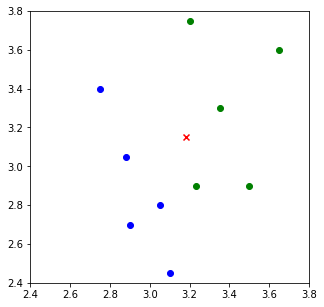

In [135]:
"""示例数据绘图
"""
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature=list(map(lambda x:x[0],features)) # 返回每个数据的x特征值
y_feature=list(map(lambda y:y[1],features))
plt.scatter(x_feature[:5],y_feature[:5],c='b') # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:],y_feature[5:],c='g') # 在画布上绘画出"B"类标签的数据点
plt.scatter([3.18], [3.15], c="r", marker="x") # 待测试点的坐标为 [3.1，3.2]

由上图所示，标签为 `A`（蓝色圆点）的数据在画布的左下角位置，而标签为 `B`（绿色圆点）的数据在画布的右上角位置，通过图像可以清楚看出不同标签数据的分布情况。其中<font color="red">红色 x 点</font>即表示本次实验需预测类别的测试数据。

### 距离度量

在计算两个样本间的相似度时，可以通过计算样本之间特征值的距离进行表示。若两个样本距离值越大（相距越远），则表示两个样本相似度低，相反，若两个样本值越小（相距越近），则表示两个样本相似度越高。

计算距离的方法有很多，本实验介绍两个最为常用的距离公式：**曼哈顿距离**和**欧式距离**。这两个距离的计算图示如下：

![PIC4](https://ws3.sinaimg.cn/large/006tNbRwly1fvn0ace9f7j30k50a7jsu.jpg)

#### 曼哈顿距离

曼哈顿距离又称马氏距离，出租车距离，是计算距离最简单的方式之一。公式如下：

$$d_{man}=\sum_{i=1}^{N}\left | X_{i}-Y_{i} \right | $$  

其中： 

- $X$,$Y$：两个数据点
- $N$：每个数据中有 $N$ 个特征值
- $X_{i}$ ：数据 $X$ 的第 $i$ 个特征值  

公式表示为将两个数据 $X$ 和 $Y$ 中每一个对应特征值之间差值的绝对值，再求和，便得到曼哈顿距离。

In [136]:
"""曼哈顿距离计算
"""
def dist_man(x,y):
    d = np.sum(np.abs(x-y))
    return d


# x = np.array([3.1, 3.2])
# print("x:", x)
# y = np.array([2.5, 2.8])
# print("y:", y)

# dist_man = dist_man(x,y)
# print(dist_man)

#### 欧式距离
欧式距离源自 $N$ 维欧氏空间中两点之间的距离公式。表达式如下:

$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$  
其中：

- $X$, $Y$ ：两个数据点
- $N$：每个数据中有 $N$ 个特征值
- $X_{i}$ ：数据 $X$ 的第 $i$ 个特征值  

公式表示为将两个数据 $X$ 和 $Y$ 中的每一个对应特征值之间差值的平方，再求和，最后开平方，便是欧式距离。

In [137]:
"""欧氏距离的计算
"""
def d_euc(x,y):
    d = np.sqrt(np.sum(np.square(x-y)))
    return d

### 决策规则

在得到测试样本和训练样本之间的相似度后，通过相似度的排名，可以得到每一个测试样本的 K 个相邻的训练样本，那如何通过 K 个邻居来判断测试样本的最终类别呢？可以根据数据特征对决策规则进行选取，不同的决策规则会产生不同的预测结果，最常用的决策规则是：  

- **多数表决法**：多数表决法类似于投票的过程，也就是在 K 个邻居中选择类别最多的种类作为测试样本的类别。  
- **加权表决法**：根据距离的远近，对近邻的投票进行加权，距离越近则权重越大，通过权重计算结果最大值的类为测试样本的类别。

In [138]:
"""多数表决法
"""

'多数表决法\n'

In [139]:
arr = {'A': 3, 'B': 2, "C": 6, "D": 5}

In [140]:
def majority_voting(class_count):
    sorted_class_count = sorted(                                #对字典类型结构排序
    class_count.items(),key=operator.itemgetter(1),reverse= True)
    
    return sorted_class_count

In [141]:
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

在多数表决法的定义中，我们导入了 `operater` 计算模块，目的是对字典类型结构排序。可以从结果中看出函数返回的结果为票数最多的 `C`，得票为 `6` 次。

### KNN 算法实现

在学习完以上的各个步骤之后，KNN 算法也逐渐被勾勒出来。以下就是对 KNN 算法的完整实现，本次实验的距离计算采用**欧式距离**，分类的决策规则为**多数表决法**，定义函数 `knn_classify()`，其中函数的参数包括：

- `test_data`：用于分类的输入向量。
- `train_data`：输入的训练样本集。
- `labels`：样本数据的类标签向量。
- `k`：用于选择最近邻居的数目。

In [142]:
def knn_classify(test_data,train_data,labels,k):
    # 创建一个空的数组用于存放距离
    distances = np.array([])
    
    # 使用欧式距离计算数据相似度,将每个train_data中的点 和 test的点 之间的距离进行计算
    for each_dta in train_data:
        d = d_euc(test_data, each_dta)
        distances = np.append(distances,d)
    
    # 获取按距离大小排序后的索引,默认是升序排列
    sorted_distance_index = distances.argsort()
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k]+sorted_distance[k-1])/2  # 计算r,后面画图用

    # 创建一个空的字典来记录每个类的票数
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_distance_index[i]] # 如果k=3,则记录下sorted_distance_index中前3的样本记录索引对应的label
        # 并同时在字典在对应的label上加1，如 vote_label为A，则在class_count中A对应的value上加1，没加则创建并写为0
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
        
    final_label = majority_voting(class_count) # 对生成好标签进行排序
    return final_label,r

### 分类预测

在实现 KNN 算法之后，接下来就可以对我们未知数据`[3.18,3.15]`开始分类,假定我们 K 值初始设定为 5，让我们看看分类的效果。

In [143]:
test_data = np.array([3.18, 3.15])
final_label,r= knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

### 可视化展示

在对数据 `[3.18,3.15]` 实现分类之后，接下来我们同样用画图的方式形象化展示 KNN 算法决策方式。

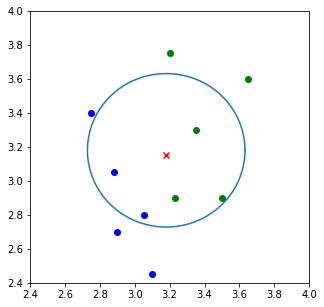

In [153]:
def circle(r,a,b):   # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    # r是前面用到的，a,b 是数据[3.18,3.15]
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r*np.cos(theta)
    y = a+r*np.sin(theta)
    return x,y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5,5))
plt.xlim(2.4,4)
plt.ylim(2.4,4)

x_feature = list(map(lambda x:x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y:y[1], features))
plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

如图所示，当我们 `K` 值为 `5` 时，与测试样本距离最近的 `5` 个训练数据（如蓝色圆圈所示）中属于 `B` 类的有 `3` 个，属于 `A` 类的有 `2` 个，根据多数表决法决策出测试样本的数据为 `B` 类。

在 KNN 算法中，K 值的选择对数据的最终决策有很大的影响，下面我们引入 `ipywidgets` 模块更加清晰的反映 K 的选择对预测结果影响。其中 `ipywidgets` 模块是 `jupyter` 中的一个交互式模块，可以通过下拉菜单选择不同的 K 值进行判断并预测未知点最后的种类。

In [155]:
from ipywidgets import interact, fixed

def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)
    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))
    x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
    y_feature = list(map(lambda y: y[1], features))
    plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
    plt.scatter(x_feature[5:], y_feature[5:], c="g")
    plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

interact(change_k, test_data=fixed(test_data),
         features=fixed(features), k=[3, 5, 7, 9])

interactive(children=(Dropdown(description='k', options=(3, 5, 7, 9), value=3), Output()), _dom_classes=('widg…

<function __main__.change_k(test_data, features, k)>

从图中可以直观的看到，不同的 K 值预测出不同的结果。

## K-近邻分类预测

接下来，我们使用 KNN 算法对真实数据集进行分类预测。

### 加载数据集

本次使用的数据集为丁香花数据集`course-9-syringa.csv`，丁香花数据集包含 `daphne`，`syringa` 和 `willow` 等 `3` 个种类，即标签（labels），其中每个种类包含 `150` 条数据，每条数据包含 `4` 个特征值：**花萼长度**，**花萼宽度**，**花瓣长度**，**花瓣宽度**。利用 Pandas 将其导入成 DataFrame 格式。

In [156]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/course-9-syringa.csv

--2018-09-27 08:49:30--  http://labfile.oss.aliyuncs.com/courses/1081/course-9-syringa.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3899 (3.8K) [text/csv]
Saving to: ‘course-9-syringa.csv’

course-9-syringa.cs 100%[===================>]   3.81K  --.-KB/s    in 0s      

2018-09-27 08:49:31 (61.8 MB/s) - ‘course-9-syringa.csv’ saved [3899/3899]



In [157]:
"""加载数据集
"""
import pandas as pd

df = pd.read_csv('course-9-syringa.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,labels
146,5.4,2.5,4.1,1.9,willow
28,5.2,3.4,2.6,3.0,daphne
140,6.5,3.1,4.1,2.4,willow
85,6.0,3.4,4.5,1.7,syringa
133,5.5,2.8,4.5,1.5,willow


为了使我们对数据更加了解，同样我们用 `plt` 将各个数据的特征绘制出来。由于丁香花数据集有 `4` 个特征值，在二维空间中无法直接表示，所以只有采用特征组合的方式绘画特征分布图。下面将 `4` 个特征，进行两两组合得到 `6` 种情况，并采用子图的方式进行绘制。

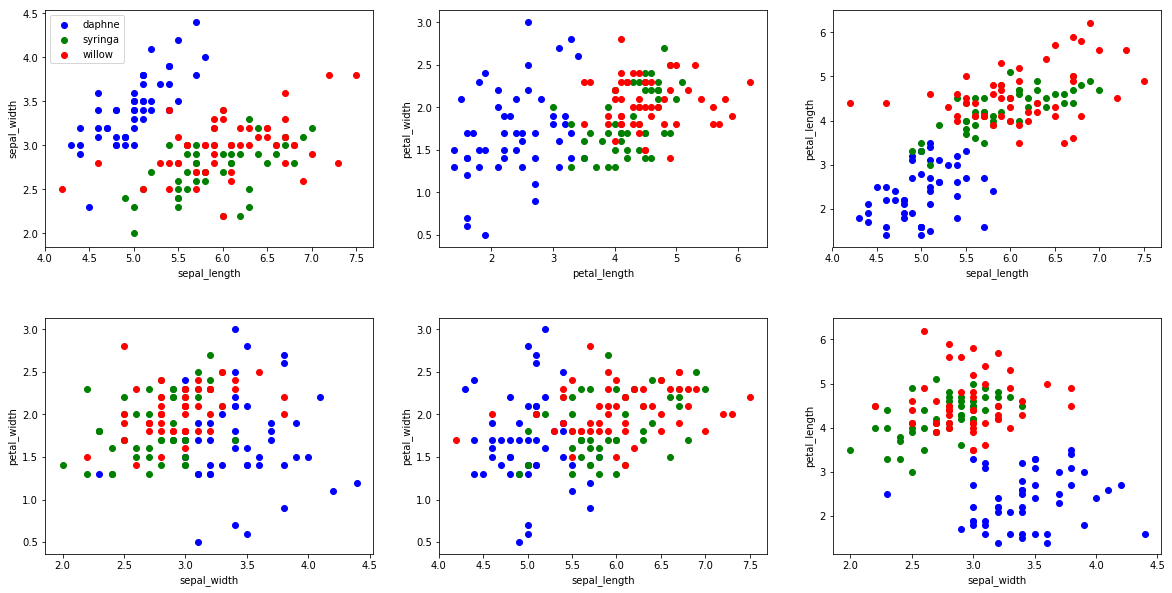

In [181]:
"""绘制丁香花特征子图
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 构建生成 2*3 的画布，2 行 3 列
fig.subplots_adjust(hspace=0.3, wspace=0.2)  # 定义每个画布内的行间隔和高间隔
axes[0, 0].set_xlabel("sepal_length")  # 定义 x 轴坐标值
axes[0, 0].set_ylabel("sepal_width")  # 定义 y 轴坐标值
axes[0, 0].scatter(df.sepal_length[:50],
                   df.sepal_width[:50], c="b")
axes[0, 0].scatter(df.sepal_length[50:100],
                   df.sepal_width[50:100], c="g")
axes[0, 0].scatter(df.sepal_length[100:],
                   df.sepal_width[100:], c="r")
axes[0, 0].legend(["daphne", "syringa", "willow"], loc=2)  # 定义示例

axes[0, 1].set_xlabel("petal_length")
axes[0, 1].set_ylabel("petal_width")
axes[0, 1].scatter(df.petal_length[:50],
                   df.petal_width[:50], c="b")
axes[0, 1].scatter(df.petal_length[50:100],
                   df.petal_width[50:100], c="g")
axes[0, 1].scatter(df.petal_length[100:],
                   df.petal_width[100:], c="r")

axes[0, 2].set_xlabel("sepal_length")
axes[0, 2].set_ylabel("petal_length")
axes[0, 2].scatter(df.sepal_length[:50],
                   df.petal_length[:50], c="b")
axes[0, 2].scatter(df.sepal_length[50:100],
                   df.petal_length[50:100], c="g")
axes[0, 2].scatter(df.sepal_length[100:],
                   df.petal_length[100:], c="r")

axes[1, 0].set_xlabel("sepal_width")
axes[1, 0].set_ylabel("petal_width")
axes[1, 0].scatter(df.sepal_width[:50],
                   df.petal_width[:50], c="b")
axes[1, 0].scatter(df.sepal_width[50:100],
                   df.petal_width[50:100], c="g")
axes[1, 0].scatter(df.sepal_width[100:],
                   df.petal_width[100:], c="r")

axes[1, 1].set_xlabel("sepal_length")
axes[1, 1].set_ylabel("petal_width")
axes[1, 1].scatter(df.sepal_length[:50],
                   df.petal_width[:50], c="b")
axes[1, 1].scatter(df.sepal_length[50:100],
                   df.petal_width[50:100], c="g")
axes[1, 1].scatter(df.sepal_length[100:],
                   df.petal_width[100:], c="r")

axes[1, 2].set_xlabel("sepal_width")
axes[1, 2].set_ylabel("petal_length")
axes[1, 2].scatter(df.sepal_width[:50],
                   df.petal_length[:50], c="b")
axes[1, 2].scatter(df.sepal_width[50:100],
                   df.petal_length[50:100], c="g")
axes[1, 2].scatter(df.sepal_width[100:],
                   df.petal_length[100:], c="r")

### 数据划分

当得到一个数据集时，希望通过该数据集得到一个训练模型，我们常常将数据切分为两部分，一部分为**训练集**，一部分为**测试集**。根据经验，较好的切分方法为**随机切分**，切分比例为：`70%` 作为训练集，`30%` 作为测试集。  

在此我们使用了`scikit-learn` 模块的 `train_test_split` 函数完成数据集切分。

```python
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.4, random_state=0)
```

其中：

- `X_train`,`X_test`, `y_train`, `y_test` 分别表示，切分后的特征的训练集，特征的测试集，标签的训练集，标签的测试集；其中特征和标签的值是一一对应的。  
- `train_data`,`train_target`分别表示为待划分的特征集和待划分的标签集。
- `test_size`：测试样本所占比例。
- `random_state`：随机数种子,在需要重复实验时，保证在随机数种子一样时能得到一组一样的随机数。

In [188]:
from sklearn.model_selection import train_test_split

# 得到 df 数据集中 feature 的全部序列: sepal_length,sepal_width,petal_length,petal_width

feature_data = df.iloc[:,:-1]
# label_data = df.iloc[:,-1]
label_data = df['labels'] # 得到 df 数据集中 label 的序列

x_train,x_test,y_train,y_test = train_test_split(feature_data,label_data,test_size=0.3,random_state = 2)
x_test.shape

(45, 4)

### 训练模型

在之前实验部分我们已经通过`python`按照流程实现 KNN 算法，在实战中，我们更常使用 `scikit-learn` 库中 KNN 函数实现数据的分类。  

```python
from sklearn import neighbors

neighbors.KNeighborsClassifier((n_neighbors=5, weights='uniform', algorithm='auto')
```

其中：  
- `n_neighbors` : `k` 值，表示邻近个数，默认为 `5`。
- `weights` : 决策规则选择，多数表决或加权表决，可用参数（`'uniform'`,`'distance'`）
- `algorithm` : 搜索算法选择（`auto`，`kd_tree`, `ball_tree`），包括逐一搜索，`kd` 树搜索或 `ball` 树搜索

In [190]:
from sklearn import neighbors

In [191]:
"""使用sklearn构建 KNN 预测模型
"""

from sklearn import neighbors

def sklearn_KNN_classify(train_data, label_data, test_data, k_num):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k_num)
    knn.fit(train_data, label_data) #训练
    predict_label = knn.predict(test_data)
    return predict_label

### 模型预测

在上面定义函数之后，接下来就是对丁香花数据集中分出的测试集进行分类，传入 `x_train`,`y_train`,`x_test`以及 K 值 `3`,通过 KNN 算法分类后，输出测试集的分类结果。

In [194]:
"""使用数据集进行预测
"""
y_predict = sklearn_KNN_classify(x_train,y_train,x_test,k_num=3)
y_predict

array(['daphne', 'daphne', 'willow ', 'daphne', 'daphne', 'willow ',
       'daphne', 'syringa', 'willow ', 'daphne', 'daphne', 'daphne',
       'daphne', 'daphne', 'syringa', 'syringa', 'syringa', 'willow ',
       'syringa', 'willow ', 'syringa', 'willow ', 'willow ', 'syringa',
       'syringa', 'daphne', 'daphne', 'willow ', 'daphne', 'willow ',
       'willow ', 'daphne', 'syringa', 'willow ', 'willow ', 'daphne',
       'willow ', 'willow ', 'syringa', 'willow ', 'willow ', 'willow ',
       'willow ', 'syringa', 'daphne'], dtype=object)

### 准确率计算

得到预测结果后，我们需要评估模型的表现，也就是得出模型预测的准确度。计算准确率就是比较预测值和真实值的差异，得到预测正确的样本数，将其除以测试集的总个数。

In [197]:
"""计算准确度
"""

def get_accuracy(test_labels,pred_labels):
    correct = np.sum(test_labels == pred_labels) # 计算两个label之间的相同值
    n = len(test_labels)  # 总测试集数据个数
    accuracy = correct/n*100
    return accuracy

In [198]:
get_accuracy(y_test,y_predict)

77.777777777777786

### K 值选择

当 `K` 值选取为 `3` 时，可以看到准确率不高，分类效果不太理想。 K 值的选取一直都是一个热门的话题，至今也没有得到很好的解决方法，根据经验，`K `值的选择最好不超过 **样本数量的平方根** 。所以可以通过遍历的方式选择合适的 `K` 值。以下我们从 `2` 到 `10` 中画出每一个 `K` 值的准确率从而获得最佳 `K` 值。

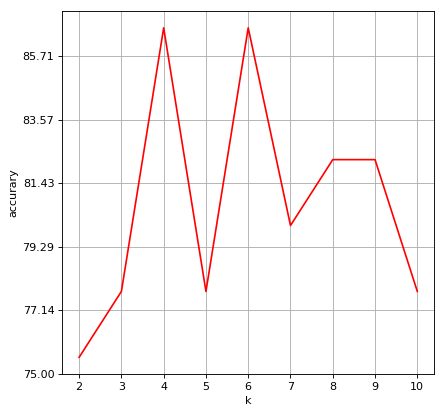

In [220]:
accuracy_list = []
k_value = range(2,11)

for k in k_value:
    y_predict = sklearn_KNN_classify(x_train,y_train,x_test,k)
    accurary = get_accuracy(y_test,y_predict)
    accuracy_list.append(accurary)
    
# 画图
plt.figure(figsize=(6,6),dpi=(80))
plt.xlabel('k')
plt.ylabel('accurary')
new_ticks = np.linspace(60, 90, 15)  # 设定 y 轴显示，从 0.6 到 0.9
plt.yticks(new_ticks)
plt.plot(k_value, accuracy_list, c='r')
plt.grid(True)  # 给画布增加网格

从图像中可以得到，当 `K=4` 和 `K=6` 时，模型准确率相当。但机器学习选择最优模型时，我们一般会考虑到模型的泛化能力，所以这里选择 `K=4`，也就是更简单的模型。

## Kd 树

KNN 算法的易于理解，很大程度上由于在对 KNN 实现输入示例分类时所用方法是线性扫描，即输入示例与每一个训练示例做距离计算。正因如此，当数据量特别大时，这样的计算会非常耗时。为了提高 KNN 搜索效率，减少计算距离的次数，可以通过构建 Kd 树的方法提高计算效率。

### Kd 树简介

Kd 树（英文：K-dimension tree）是一种对 K 维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。Kd 树是一种二叉树，表示对 K 维空间的一个划分，构造 Kd 树相当于不断地用垂直于坐标轴的超平面将 K 维空间切分，构成一系列的 K 维超矩形区域。Kd 树的每个结点对应于一个 K 维超矩形区域。利用Kd 树可以省去对大部分数据点的搜索，从而减少搜索的计算量。

![pics](https://ws1.sinaimg.cn/large/006tNc79ly1fvq9td4q7yj30pj0bvt9e.jpg)

Kd树的具体原理可以参考：KNN算法与Kd树 https://www.cnblogs.com/21207-iHome/p/6084670.html

### Kd 树最邻近搜索

以下便是 Kd 树的最邻近搜索步骤：

- 从根节点开始，递归的往下移。往左还是往右的决定方法与插入元素的方法一样(如果输入点在分区面的左边则进入左子节点，在右边则进入右子节点)。  
- 一旦移动到叶节点，将该节点当作"目前最佳点"。 
- 解开递归，并对每个经过的节点运行下列步骤：  
    - 如果目前所在点比目前最佳点更靠近输入点，则将其变为目前最佳点。  
    - 检查另一边子树有没有更近的点，如果有则从该节点往下找  
- 当根节点搜索完毕后完成最邻近搜索

In [244]:
"""引入时间函数计算程序运行的时间
"""
import time

def dif_knn():
    # 不使用 kd 树计算
    time_start1 = time.time() #时间打点器
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    predict_label = knn.predict(x_test)
    time_end1 = time.time()
#     print("normal_time:", time_end1-time_start1)

    # 使用 kd 树计算
    time_start2 = time.time()
    kd_knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    kd_knn.fit(x_train, y_train)
    predict_label = kd_knn.predict(x_test)
    time_end2 = time.time()
#     print("kd_tree_time:", time_end2-time_start2)
    return time_end1-time_start1,time_end2-time_start2


def mean_time():
    time_list1= []
    time_list2= []
    for i in range(1,1000):
        dif_knn()
        time_list1.append(dif_knn()[0])
        time_list2.append(dif_knn()[1])
    mean_list1 = sum(time_list1)/len(time_list1)
    mean_list2 = sum(time_list2)/len(time_list2)
#   print(mean_list1,mean_list2)
    return mean_list1,mean_list2

mean_time()

(0.0012681035546807794, 0.0012564883456454502)